# 02 - Simple Linear Regression

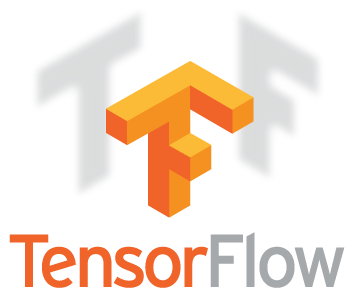

In [3]:
import tensorflow as tf
import numpy as np

print(tf.__version__)

2.3.0


## Hypothesis and Cost

### Hypothesis


### Cost


In [4]:
x_data = [1, 2, 3, 4, 5]
y_data = [1, 2, 3, 4, 5]

(0.0, 8.0)

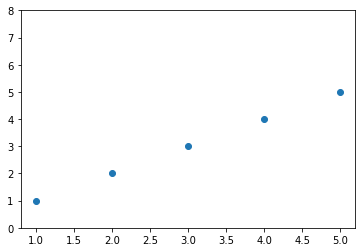

In [5]:
import matplotlib.pyplot as plt
plt.plot(x_data, y_data, 'o')
plt.ylim(0, 8)

## Hypothesis

In [6]:
v = [1., 2., 3., 4.]
tf.reduce_mean(v) # 2.5

<tf.Tensor: shape=(), dtype=float32, numpy=2.5>

In [8]:
tf.square(3)  # 9

<tf.Tensor: shape=(), dtype=int32, numpy=9>

In [11]:
x_data = [1, 2, 3, 4, 5]
y_data = [1, 2, 3, 4, 5]

W = tf.Variable(2.0)
b = tf.Variable(0.5)

hypothesis = W * x_data + b

In [12]:
W.numpy(), b.numpy()

(2.0, 0.5)

In [13]:
hypothesis.numpy()

array([ 2.5,  4.5,  6.5,  8.5, 10.5], dtype=float32)

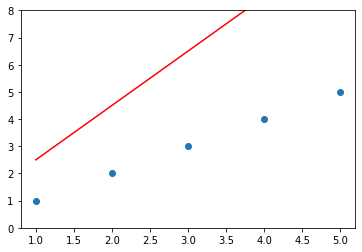

In [14]:
plt.plot(x_data, hypothesis.numpy(), 'r-')
plt.plot(x_data, y_data, 'o')
plt.ylim(0, 8)
plt.show()

## Cost

In [15]:
cost = tf.reduce_mean(tf.square(hypothesis - y_data))

In [18]:
with tf.GradientTape() as tape:
    hypothesis = W * x_data + b
    cost = tf.reduce_mean(tf.square(hypothesis - y_data))
    
W_grad, b_grad = tape.gradient(cost, [W, b])
W_grad.numpy(), b_grad.numpy()

(25.0, 7.0)

## 파라미터 업데이트

In [20]:
learning_rate = 0.01

W.assign_sub(learning_rate * W_grad)
b.assign_sub(learning_rate * b_grad)

W.numpy(), b.numpy()

(1.5, 0.43)

In [24]:
hypothesis = W * x_data + b
hypothesis.numpy()

array([1.9300001, 3.43     , 4.93     , 6.43     , 7.93     ],
      dtype=float32)

(0.0, 8.0)

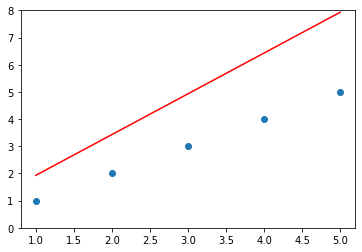

In [25]:
plt.plot(x_data, hypothesis.numpy(), 'r-')
plt.plot(x_data, y_data, 'o')
plt.ylim(0, 8)

## 여러 번 반복

    0|    2.4520|    0.3760| 45.660004
   10|    1.1036|    0.0034|  0.206336
   20|    1.0128|   -0.0209|  0.001026
   30|    1.0065|   -0.0218|  0.000093
   40|    1.0059|   -0.0212|  0.000083
   50|    1.0057|   -0.0205|  0.000077
   60|    1.0055|   -0.0198|  0.000072
   70|    1.0053|   -0.0192|  0.000067
   80|    1.0051|   -0.0185|  0.000063
   90|    1.0050|   -0.0179|  0.000059


(0.0, 8.0)

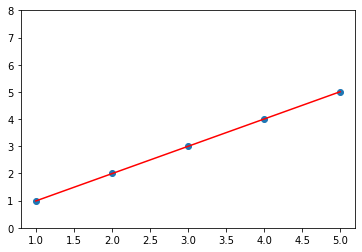

In [26]:
W = tf.Variable(2.9)
b = tf.Variable(0.5)

for i in range(100):
    with tf.GradientTape() as tape:
        hypothesis = W * x_data + b
        cost = tf.reduce_mean(tf.square(hypothesis - y_data))
    W_grad, b_grad = tape.gradient(cost, [W, b])
    W.assign_sub(learning_rate * W_grad)
    b.assign_sub(learning_rate * b_grad)
    
    if i % 10 == 0:
        print("{:5}|{:10.4f}|{:10.4f}|{:10.6f}".format(i, W.numpy(), b.numpy(), cost))
        
plt.plot(x_data, y_data, 'o')
plt.plot(x_data, hypothesis.numpy(), 'r-')
plt.ylim(0, 8)

## predict

In [27]:
print(W * 5 + b)
print(W * 2.5 + b)

tf.Tensor(5.0066934, shape=(), dtype=float32)
tf.Tensor(2.4946523, shape=(), dtype=float32)


## 전체 코드

In [28]:
import tensorflow as tf
import numpy as np

# Data
x_data = [1, 2, 3, 4, 5]
y_data = [1, 2, 3, 4, 5]

# W, b initialize
W = tf.Variable(2.9)
b = tf.Variable(0.5)

# W, b update
for i in range(100):
    # Gradient descent
    with tf.GradientTape() as tape:
        hypothesis = W * x_data + b
        cost = tf.reduce_mean(tf.square(hypothesis - y_data))
    W_grad, b_grad = tape.gradient(cost, [W, b])
    W.assign_sub(learning_rate * W_grad)
    b.assign_sub(learning_rate * b_grad)
    if i % 10 == 0:
      print("{:5}|{:10.4f}|{:10.4f}|{:10.6f}".format(i, W.numpy(), b.numpy(), cost))

print()

# predict
print(W * 5 + b)
print(W * 2.5 + b)

    0|    2.4520|    0.3760| 45.660004
   10|    1.1036|    0.0034|  0.206336
   20|    1.0128|   -0.0209|  0.001026
   30|    1.0065|   -0.0218|  0.000093
   40|    1.0059|   -0.0212|  0.000083
   50|    1.0057|   -0.0205|  0.000077
   60|    1.0055|   -0.0198|  0.000072
   70|    1.0053|   -0.0192|  0.000067
   80|    1.0051|   -0.0185|  0.000063
   90|    1.0050|   -0.0179|  0.000059

tf.Tensor(5.0066934, shape=(), dtype=float32)
tf.Tensor(2.4946523, shape=(), dtype=float32)
